# Analyzing Text Content of all Ontologies



In [1]:
!mkdir -p output

In [ ]:
!python -m oaklib.utilities.metrics.text_content_analysis ~/repos/semantic-sql/db/*.db > output/ontologies-tc.tsv

In [2]:
import pandas as pd
df = pd.read_csv('output/ontologies-tc.tsv', sep='\t')
df

,ontology,text_content
0,/Users/cjm/repos/semantic-sql/db/aao.db,NaN
1,/Users/cjm/repos/semantic-sql/db/ado.db,0.945262
2,/Users/cjm/repos/semantic-sql/db/adw.db,NaN
3,/Users/cjm/repos/semantic-sql/db/aeo.db,0.879694
4,/Users/cjm/repos/semantic-sql/db/aero.db,NaN
...,...,...
145,/Users/cjm/repos/semantic-sql/db/go-lego.db,0.589013
146,/Users/cjm/repos/semantic-sql/db/go-nucleus.db,0.846068
147,/Users/cjm/repos/semantic-sql/db/go-plus.db,0.500000
148,/Users/cjm/repos/semantic-sql/db/go.db,0.604229


In [3]:
# replace ontology column (which is currently file path) with ontology name (stemmed file name)
import os
df['ontology'] = df['ontology'].apply(lambda x: os.path.basename(x).replace('.db',''))
df

,ontology,text_content
0,aao,NaN
1,ado,0.945262
2,adw,NaN
3,aeo,0.879694
4,aero,NaN
...,...,...
145,go-lego,0.589013
146,go-nucleus,0.846068
147,go-plus,0.500000
148,go,0.604229


In [6]:
# drop columns with all text_content values as NaN
df = df.dropna()
df

,ontology,text_content
1,ado,0.945262
3,aeo,0.879694
5,agro,0.801219
6,aio,0.940620
7,aism,0.684825
...,...,...
144,go-amigo,0.592075
145,go-lego,0.589013
146,go-nucleus,0.846068
147,go-plus,0.500000


## Plot Results

use matplotlib to plot the results as a bar chart, ordered by the text_content value

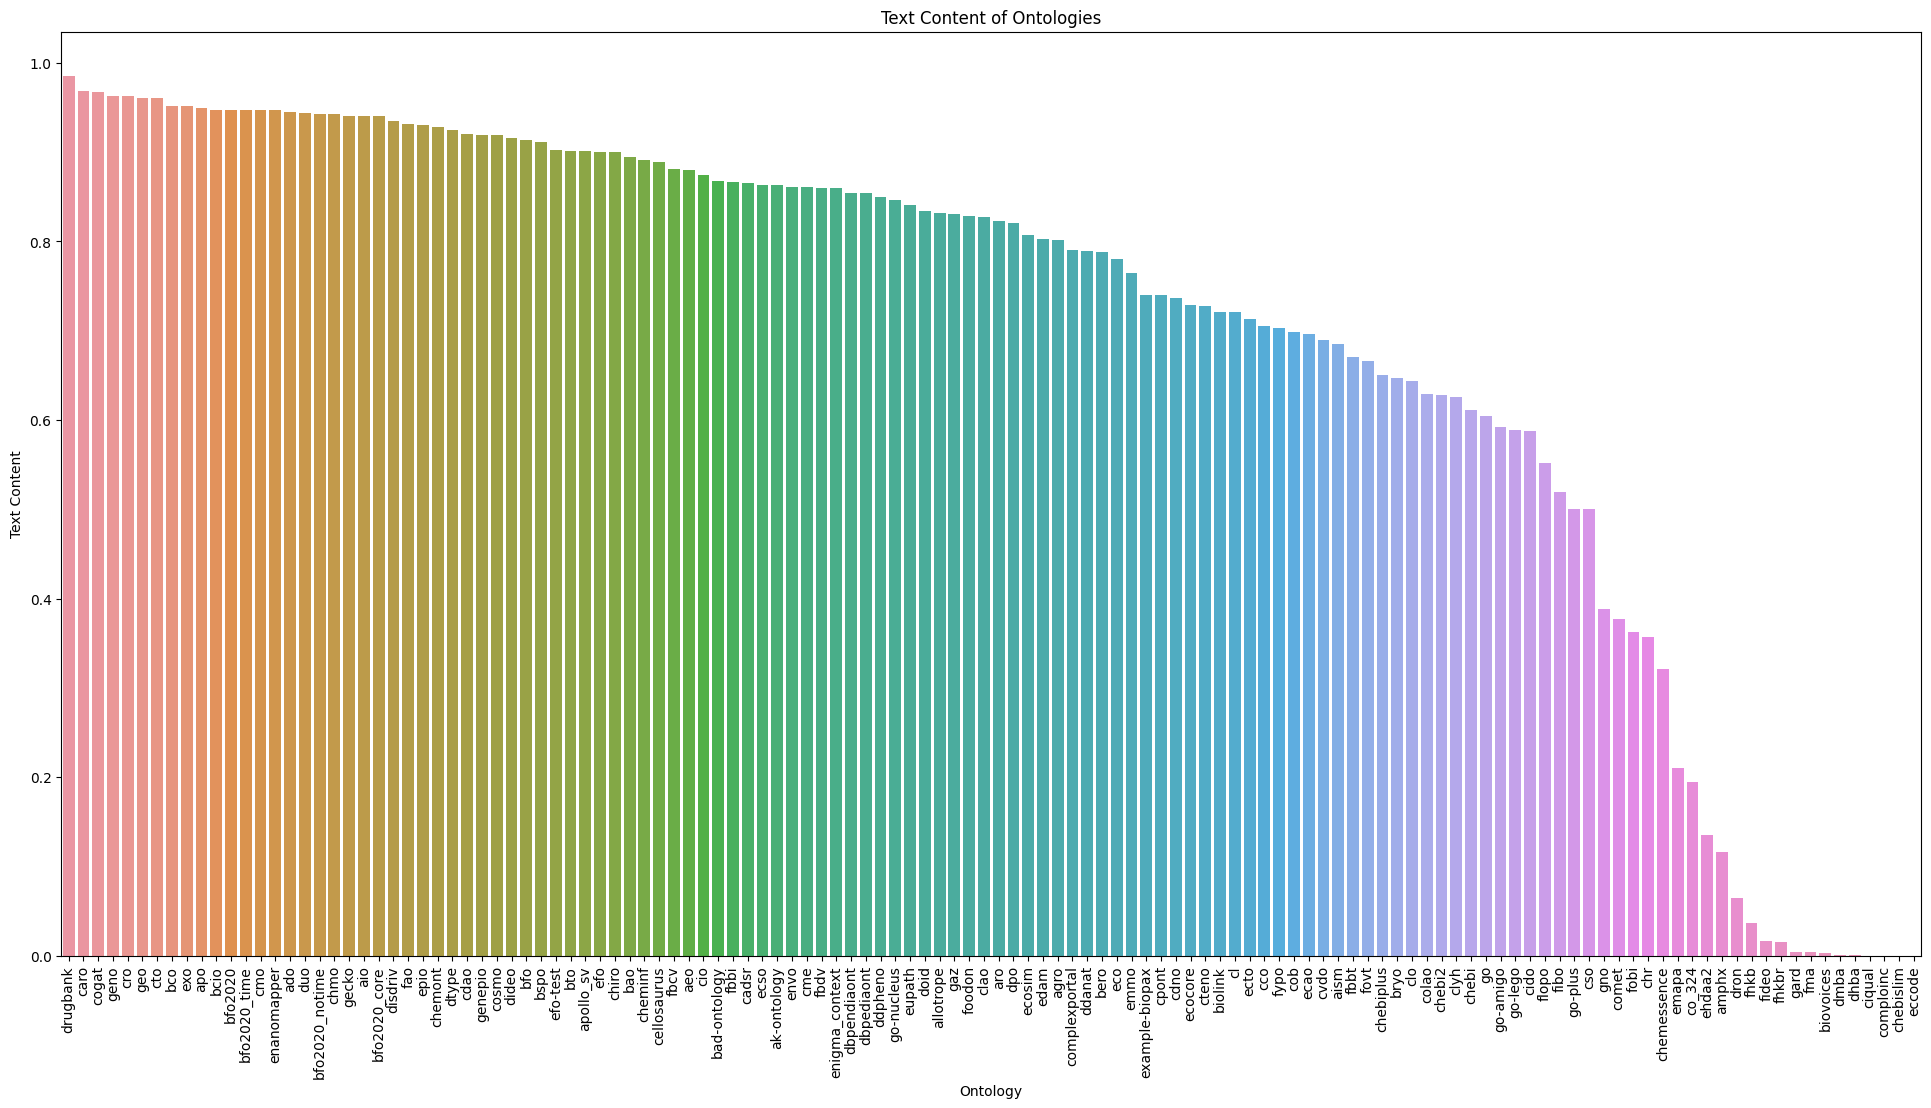

In [13]:
# use matplotlib to plot df as a bar chart
# x-axis: ontology
# y-axis: text_content
# order by text_content

import matplotlib.pyplot as plt
import seaborn as sns

df = df.sort_values('text_content', ascending=False)
plt.figure(figsize=(24, 12))
sns.barplot(x='ontology', y='text_content', data=df)
plt.xticks(rotation=90)
plt.xlabel('Ontology')
plt.ylabel('Text Content')
plt.title('Text Content of Ontologies')
plt.savefig('output/text_content.png')
plt.savefig('output/text_content.svg')
plt.show()